# **Análisis y Reporte sobre el desempeño del modelo**
### Módulo 2: Machine Learning
*Adrián Emmanuel Faz Mercado A01570770*

**Dataset**: iris.csv

**Liga al dataset**: https://www.kaggle.com/datasets/uciml/iris

**Descripción del dataset**: El dataset de "iris.csv" contiene información y registros de diferentes características de tres especies de Iris recogidas por el botánico Edgar Anderson. Existen 150 registros, y cada registro tiene las siguientes características:
* Petal_Length
* Petal_Width
* Sepal_Length
* Sepal_Width

**Problema a resolver**: El problema presentado se trata de **clasificación**, pues lo que se busca es crear un modelo que permita clasificar una muestra en base a sus características como longitud de los pétalos, anchura de los pétalos, entre otros. Se trata de clasificación porque se busca que el modelo sea capaz de clasificar a cuál de las 3 posibles clases pertenece una muestra de iris.


En este caso, nos enfocaremos en el análisis del desempeño del modelo, analizaremos los niveles de sesgo, bias y ajuste del modelo para poder evaluarlo y realizar mejoras si es que son necesarias.

Importamos las librerías necesarias

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Cargamos los datos y asignamos nuestras variables de X y Y.

In [69]:
data = pd.read_csv("iris.csv")
# Se elimina el Id, para que no afecte en el modelo.
data = data.drop(['Id'], axis = 1)

# Le asignamos "Species" a Y porque es nuestra variable de salida, la que queremos predecir.
Y = data["Species"]

# Asignamos las demás columnas como la variable X, pues nos ayudarán con el entrenamiento.
X = data.drop(['Species'], axis = 1)

Realizamos la separación de los datos en:
* Entrenamiento (X_train, y_train) - 96 datos
* Validación (X_val, y_val) - 24 datos
* Pruebas (X_test, y_test) - 30 datos


El 80% de los datos serán destinados a entrenamiento (se descompone en 2 grupos más), mientras que el 20% serán destinados a pruebas. De ese 80% que se destinó a entrenamiento, el 20% será utilizado para validar el modelo y para elegir los mejores hiperparámetros, mientras que el otro 80% será directamente para entrenamiento.



In [70]:
# Dividimos los datos en datos de entrenamiento y datos de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Luego, dividimos los datos de entrenamiento en datos de entrenamiento y validación.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

Ahora, entrenaremos el modelo sin modificar ningún parámetro con los datos de entrenamiento

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.75\ngini = 0.664\nsamples = 96\nvalue = [31, 36, 29]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.494\nsamples = 65\nvalue = [0, 36, 29]'),
 Text(0.2, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 3.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5833333333333334, 'x[3] <= 1.7\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Text(0.7, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.25, 'x[0] <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.7, 0.0833333333333

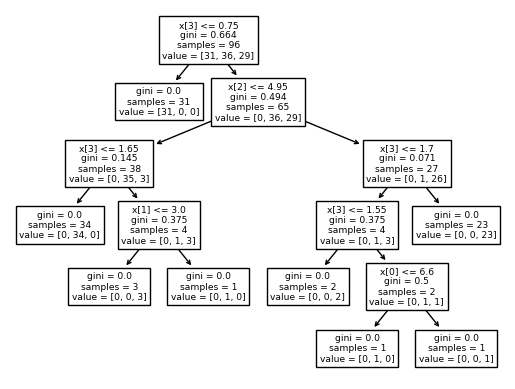

In [71]:
# Creamos nuestro objeto de Árbol de Decisión.
myTree = DecisionTreeClassifier()
myTree.fit(X_train,y_train)

plot_tree(myTree)

Ya contamos con nuestro modelo inicial, ahora revisaremos su desempeño con los datos de validación y de entrenamiento que tenemos para así analizar algunas métricas importantes.

In [72]:
# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 100.0%


En este caso, podemos observar que en los datos de validación, obtuvimos una accuracy de 95.83%, mientras que en los datos de entrenamiento, obtuvimos un 100%.

* **Modelo con Datos de Validación** - 95.83%
* **Modelo con Datos de Entrenamiento** - 100.0%


Ahora, analizaremos algunos datos importantes del desempeño del modelo obtenido.

###**Bias ó Sesgo**

Para analizar si existe algún sesgo en nuestro set de datos, comenzaremos revisando el subset de entrenamiento que se utilizó. Utilizaremos el método de describe() para analizar datos importantes las columnas utilizadas para entrenar el modelo.

In [73]:
print(X_train.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      96.000000     96.000000      96.000000     96.000000
mean        5.811458      3.014583       3.729167      1.161458
std         0.838905      0.436970       1.738960      0.727558
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.700000       1.500000      0.300000
50%         5.700000      3.000000       4.200000      1.300000
75%         6.400000      3.300000       5.025000      1.800000
max         7.900000      4.100000       6.700000      2.500000


En la tabla anterior, se puede observar que por lo menos, en la parte de count, **todos los registros están completos**, no hay ningún registro que no cuente con algún dato de de las columnas. Los 96 datos tienen todos los valores de las columnas completos, y eso es un buen indicador de que no exista algún sesgo hacia alguna columna en específico que podría tener una mayor cantidad de datos.

Ahora, se analizarán cuantos registros hay de cada clase resultante, para así analizar si no existe algún sesgo en cuestión de que exista una clase que esté entrenada de más y que quizás el modelo tienda a asignar esa clase a la mayoría de las pruebas.   

In [74]:
print(y_train.value_counts())

Iris-versicolor    36
Iris-setosa        31
Iris-virginica     29
Name: Species, dtype: int64


En la tabla anterior, podemos ver que las clases no están balanceadas completamente, y hay una mayor cantidad de registros de Iris-versicolor. Sin embargo, en realidad **la diferencia entre cantidad de clases no es tan drástica**, y hay una buena cantidad de registros de cada clase como para entrenar correctamente al modelo en todas ellas.  

Además, para analizar el sesgo en el modelo podemos tomar como base el resultado del desempeño de entrenamiento, el cual fue muy bueno, pues fue de 100%. Este resultado y los análisis anteriores nos permiten afirmar que el modelo cuenta con un **sesgo o bias bajo**. Esto nos indica que el modelo ha logrado aprender correctamente las características involucradas en los datos de entrenamiento.

###**Varianza**



Para analizar la varianza de nuestro modelo, vamos a realizar una gráfica de la curva de aprendizaje de nuestro modelo, donde se refleje de qué manera va incrementando la "accuracy" del modelo en base a la cantidad de datos que se ingresan.

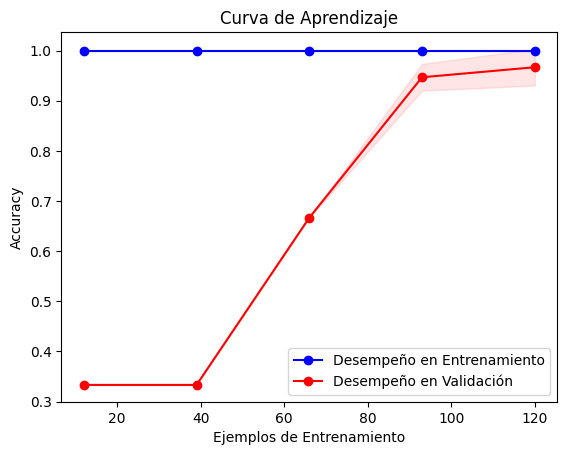

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy')

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Accuracy")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='r')

    plt.plot(train_sizes, train_mean, 'o-', color='b', label="Desempeño en Entrenamiento")
    plt.plot(train_sizes, val_mean, 'o-', color='r', label="Desempeño en Validación")

    plt.legend(loc='best')

    plt.show()

plot_learning_curve(myTree, X, Y)


En la gráfica anterior, podemos observar varias cosas. Primero, se puede ver que la línea de entrenamiento se mantiene en 1.0 de accuracy desde el inicio, mientras que en cuestión de los datos de validación, la línea va creciendo conforme van creciendo los datos, hasta que llega a un valor estable entre 0.9 y 0.95, donde llega a converger junto con la línea de entretenimiento. Se puede observar que si bien no llegan exactamente a la misma puntuación, en realidad estos se encuentran muy cerca.

Esto nos indica que contamos con un **nivel de varianza bajo**, pues si bien aun se puede mejorar para que ambos converjan al mismo nivel, la diferencia es mínima entre ellos y llegan a desempeñarse muy bien.

###**Nivel de ajuste**

Se pudo analizar que en este caso, el modelo tiene un muy leve nivel de **overfitting**, esto se debe a que hubo un mejor desempeño en los datos de entrenamiento que en los datos de validación. Sin embargo, en realidad la diferencia no es significativa, pero si es posible llegar a que estén más cerca estos valores, mejor.

En realidad, si no somos muy estrictos, podemos decir que este modelo tiene un **good fit**, pero vamos a realizar ajuste de hiperparámetros/regularización para tratar de llegar a un mejor resultado.


### **Ajuste de parámetros**

Si bien se identificó que nuestro modelo era muy bueno, pudimos ver también que tenía un ligero nivel de overfitting, pues el nivel de accuracy de entrenamiento era ligeramente mayor al de validación. Lo que buscamos es que ambos valores de accuracy sean iguales o muy parecidos, pues esto nos diría que se ajusta correctamente hasta para los datos que no ha visto.

Para intentar mejorar esto, vamos a aplicar una **técnica de regularización**, para así mejorar su capacidad de generalizar.

En este caso, vamos a modificar el parámetro de "max_depth" de nuestro árbol, pues esto nos permite restringir la complejidad de nuestro árbol y así permitir que no se ajuste tanto a los datos de entrenamiento o que se los aprenda.

Creamos un árbol nuevo con el parámetro de max_depth de 2, restringiendo que el árbol solamente pueda tener una máxima profundidad de 2.

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.664\nsamples = 96\nvalue = [31, 36, 29]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.494\nsamples = 65\nvalue = [0, 36, 29]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.145\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]')]

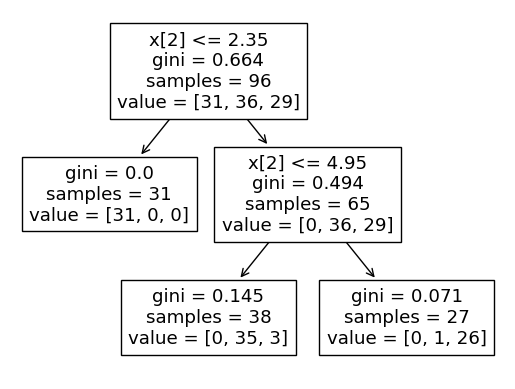

In [76]:
myTree2 = DecisionTreeClassifier(max_depth=2)
myTree2.fit(X_train,y_train)

plot_tree(myTree2)

Obtenemos los nuevos resultados de accuracy del árbol

In [77]:
# Predecimos los datos de validación utilizando el modelo creado.
y_val_pred = myTree2.predict(X_val)
# Obtenemos la accuracy de los datos de validación.
val_accuracy = accuracy_score(y_val, y_val_pred)*100

# Predecimos los datos de entrenamiento utilizando el modelo creado.
y_train_pred = myTree2.predict(X_train)
# Obtenemos el accuracy de los datos de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy validación: {val_accuracy}%")
print(f"Accuracy entrenamiento: {train_accuracy}%")

Accuracy validación: 95.83333333333334%
Accuracy entrenamiento: 95.83333333333334%


Ahora, podemos observar que el valor de la accuracy de los datos de validación, es el mismo valor que el de los datos de entrenamiento, lo cuál es exactamente lo que buscabamos y nos indica que nuestra técnica de regularización funcionó.

### **Modelo con Datos de Prueba**

Finalmente, vamos a probar nuestro modelo con los datos que definimos inicialmente como de prueba y que el modelo no ha visto.



In [78]:
# Predecimos los datos de validación utilizando el modelo creado.
y_test_pred = myTree2.predict(X_test)
# Obtenemos la accuracy de los datos de validación.
test_accuracy = accuracy_score(y_test, y_test_pred)*100

# Imprimimos ambas métricas.
print(f"Accuracy testing: {test_accuracy}%")

Accuracy testing: 90.0%


Podemos observar que nuestros datos de prueba tienen un desempeño del **90% de accuracy**, el cual es un porcentaje muy bueno y nos permite confirmar que tenemos un modelo que se puede desempeñar adecuadamente en datos generales.